In [105]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.options.mode.chained_assignment = None  #hide any pandas warnings

# sns.set(style="whitegrid", color_codes=True)

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
## Data description

# age (age in years)
# sex (1 = male, 0 = female)
# trestbps (resting blood pressure)
# chol (serum cholesteral in mg/dl)
# fbs (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
# restecg (resting electrocardiographic results)
# thalach (maximum heart rate achived)
# exang (exercised induced angina) (1 = yes, 0 = no)
# oldpeak (ST depression induced by exercise relative to rest)
# slope (the slope of the peak exercise ST segment)
# ca (number of major vessels (0-3) colored by flourosopy)
# thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
# target (what we want to predict: patient has heart disease) (1 = true, 0 = false)

In [97]:
## Read dataset
csv = 'heart.csv'
ds = pd.read_csv(csv)

# Columns rename
ds.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [91]:
## Data exploration

ds.info()
ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


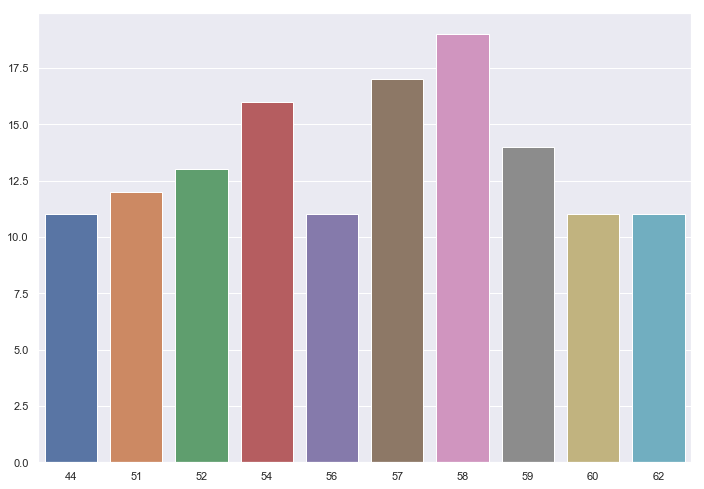

In [34]:
sns.barplot(x=ds.age.value_counts()[:10].index, y=ds.age.value_counts()[:10].values)

C:\Users\AlessioGilardi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AlessioGilardi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


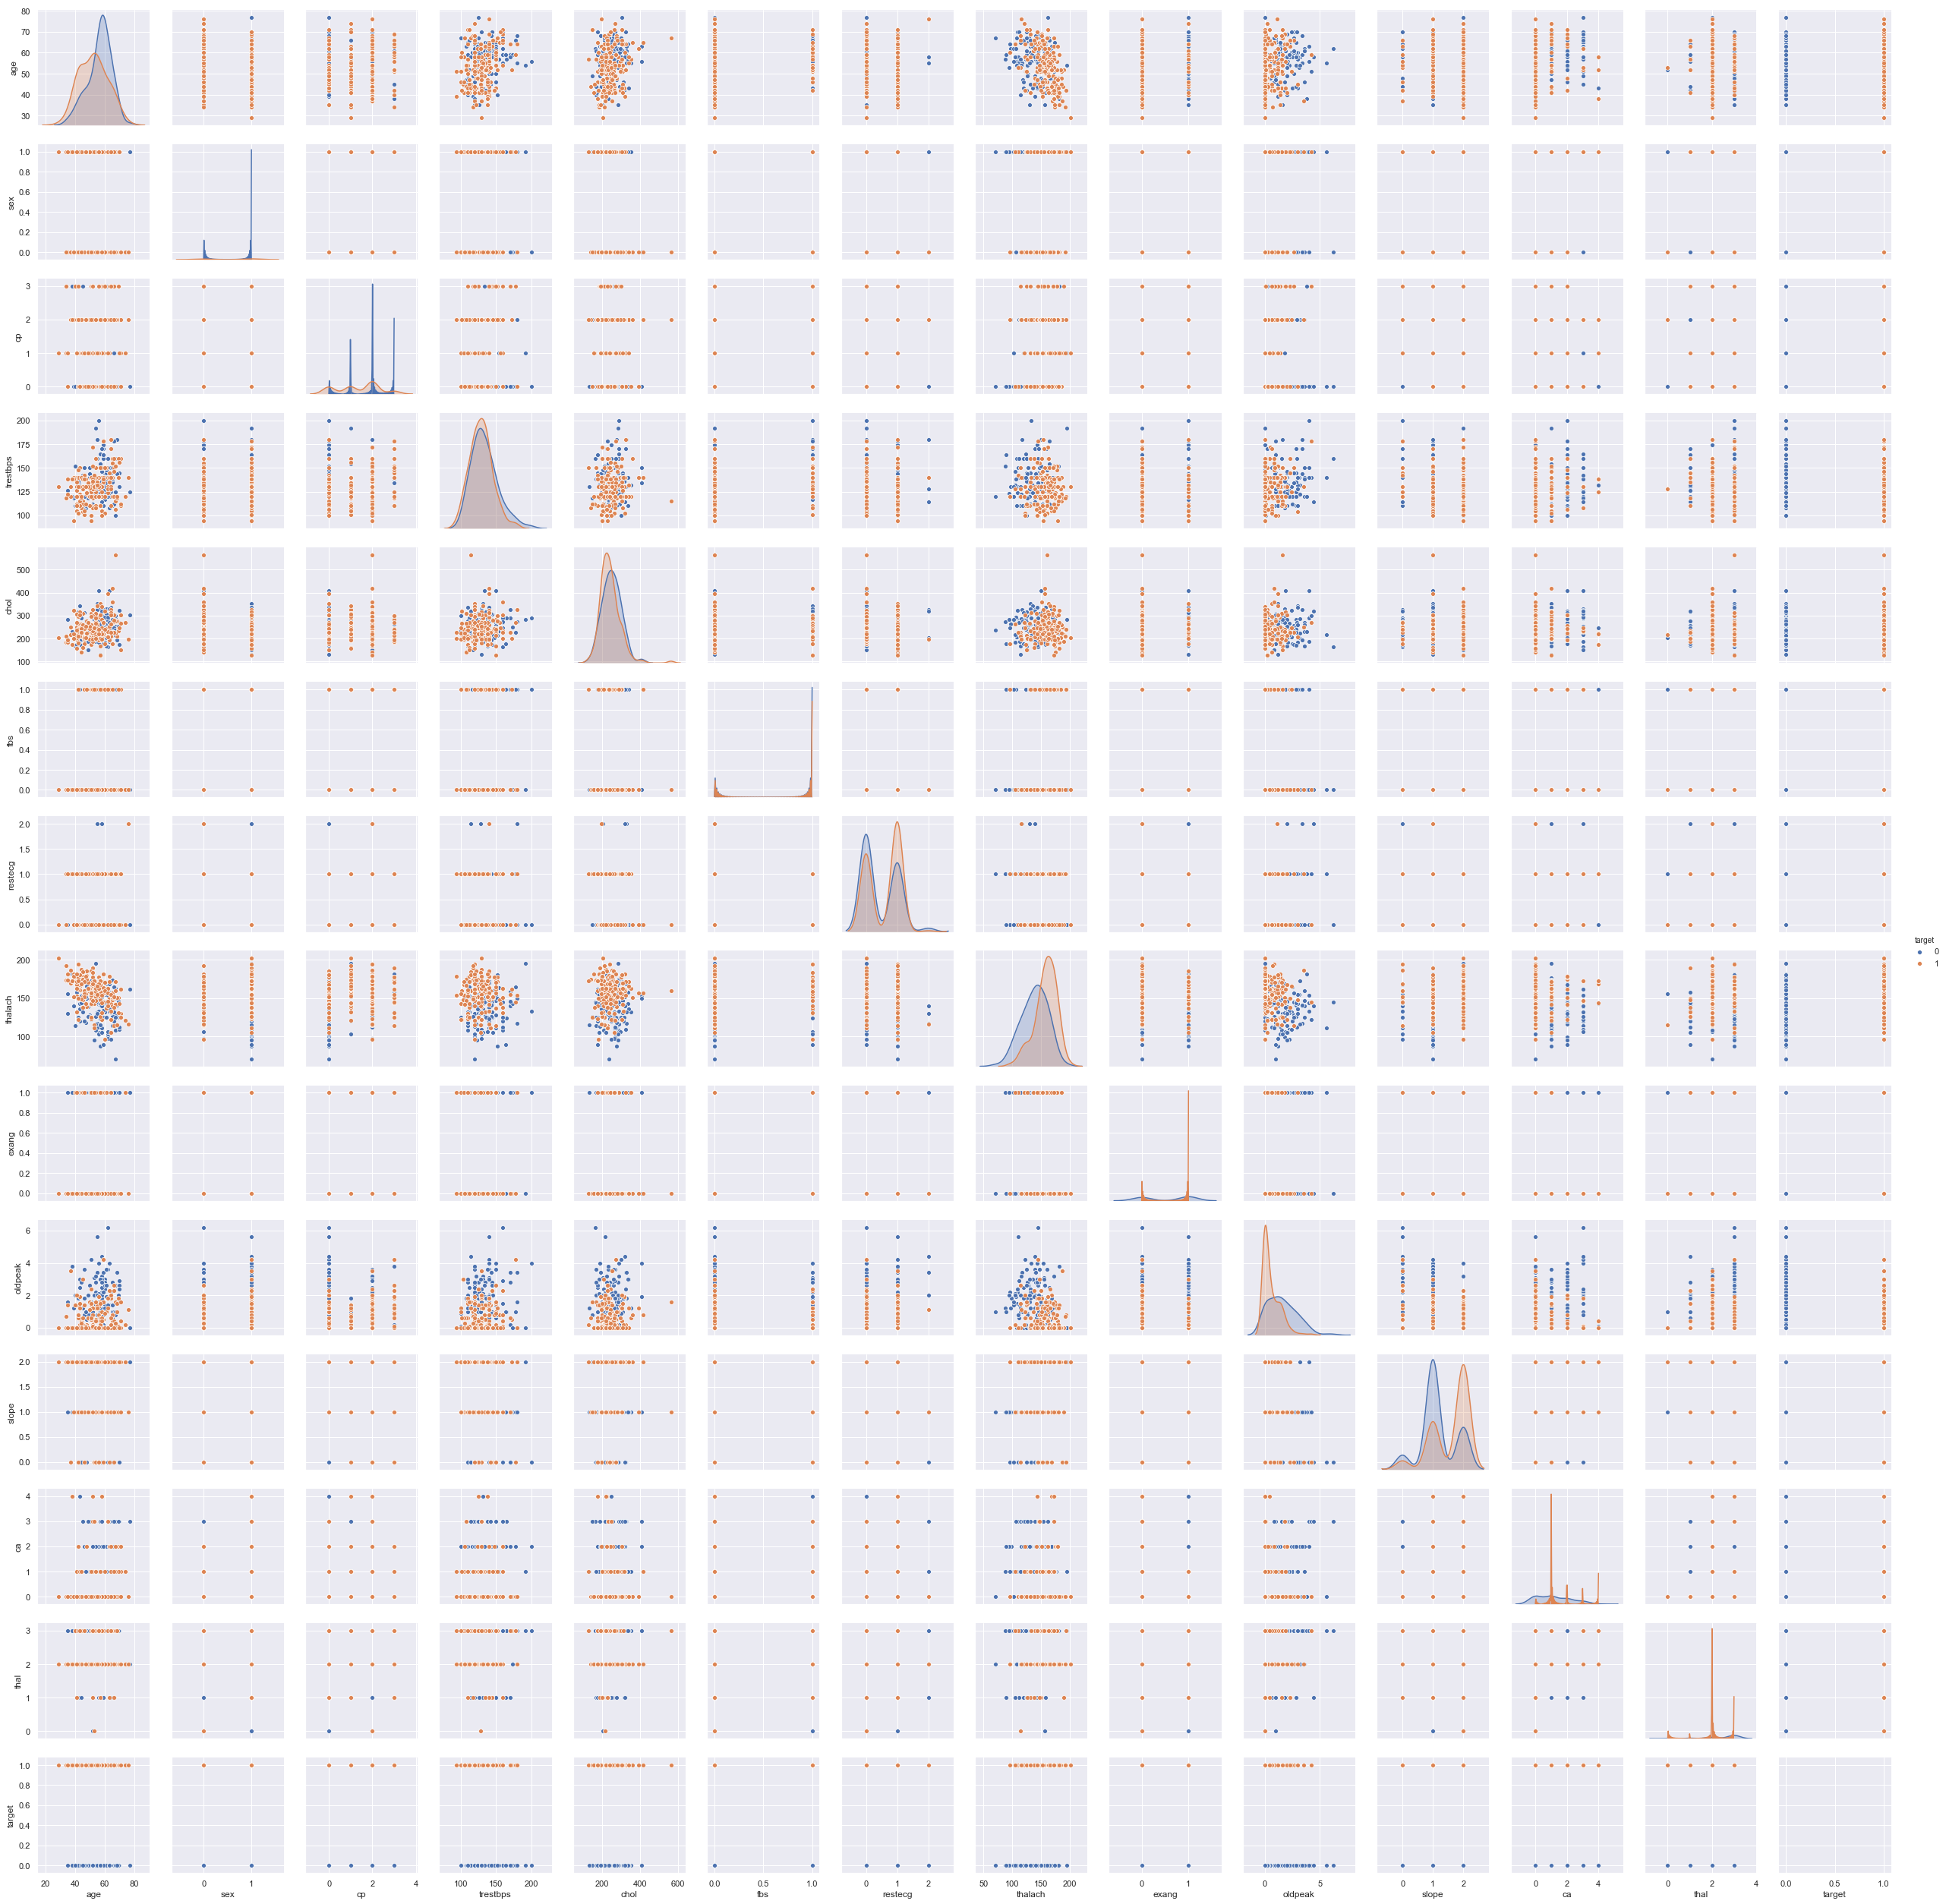

In [35]:
sns.pairplot(data=ds, hue='target')

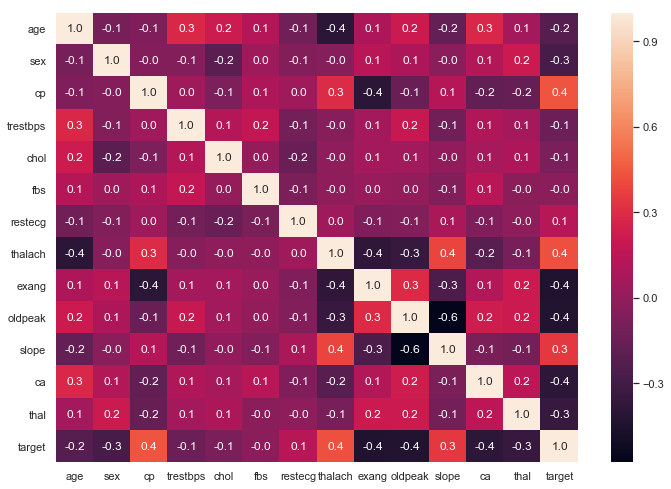

In [37]:
sns.heatmap(ds.corr(), annot=True, fmt='.1f')

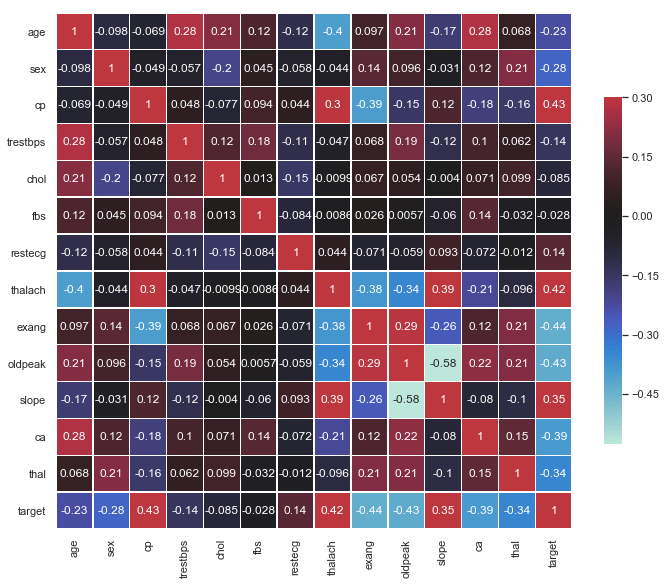

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(), vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
plt.tight_layout()
plt.show()

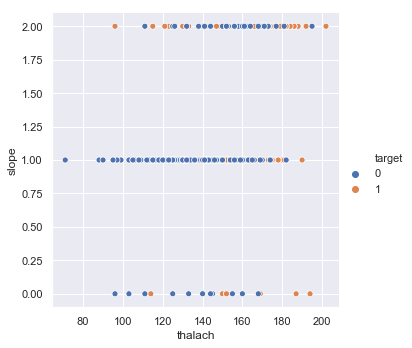

In [89]:
sns.relplot(x='thalach', y='slope', data=ds, hue='target')

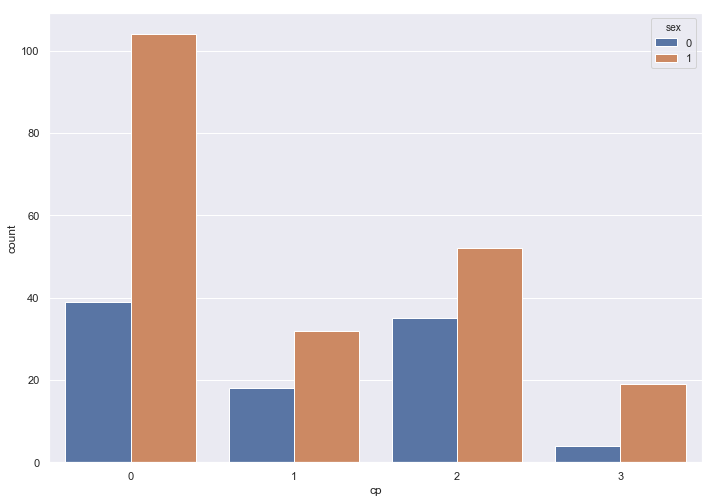

In [70]:
sns.countplot(x='cp', data=ds, hue='sex')

In [98]:
## Categorical to Dummy

# Modifico i valori in modo da identificare con chiarezza le
# feature categoriche
ds['sex'][ds['sex'] == 0] = 'female'
ds['sex'][ds['sex'] == 1] = 'male'

ds['chest_pain_type'][ds['chest_pain_type'] == 1] = 'typical angina'
ds['chest_pain_type'][ds['chest_pain_type'] == 2] = 'atypical angina'
ds['chest_pain_type'][ds['chest_pain_type'] == 3] = 'non-anginal pain'
ds['chest_pain_type'][ds['chest_pain_type'] == 4] = 'asymptomatic'

ds['fasting_blood_sugar'][ds['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
ds['fasting_blood_sugar'][ds['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

ds['rest_ecg'][ds['rest_ecg'] == 0] = 'normal'
ds['rest_ecg'][ds['rest_ecg'] == 1] = 'ST-T wave abnormality'
ds['rest_ecg'][ds['rest_ecg'] == 2] = 'left ventricular hypertrophy'

ds['exercise_induced_angina'][ds['exercise_induced_angina'] == 0] = 'no'
ds['exercise_induced_angina'][ds['exercise_induced_angina'] == 1] = 'yes'

ds['st_slope'][ds['st_slope'] == 1] = 'upsloping'
ds['st_slope'][ds['st_slope'] == 2] = 'flat'
ds['st_slope'][ds['st_slope'] == 3] = 'downsloping'

ds['thalassemia'][ds['thalassemia'] == 1] = 'normal'
ds['thalassemia'][ds['thalassemia'] == 2] = 'fixed defect'
ds['thalassemia'][ds['thalassemia'] == 3] = 'reversable defect'


# Converto i tipi in modo corretto

ds['sex'] = ds['sex'].astype('object')
ds['chest_pain_type'] = ds['chest_pain_type'].astype('object')
ds['fasting_blood_sugar'] = ds['fasting_blood_sugar'].astype('object')
ds['rest_ecg'] = ds['rest_ecg'].astype('object')
ds['exercise_induced_angina'] = ds['exercise_induced_angina'].astype('object')
ds['st_slope'] = ds['st_slope'].astype('object')
ds['thalassemia'] = ds['thalassemia'].astype('object')

# Genero le dummy features
ds = pd.get_dummies(ds, drop_first=True)

In [100]:
ds.sample(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
299,45,110,264,132,1.2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
104,50,129,196,163,0.0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
281,52,128,204,156,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
138,57,110,201,126,1.5,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0
50,51,130,256,149,0.5,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
67,45,130,234,175,0.6,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0
22,42,140,226,178,0.0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
10,54,140,239,160,1.2,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
156,47,130,253,179,0.0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
68,44,120,220,170,0.0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0


In [103]:
X = ds.drop(['target'], axis=1)
Y = ds['target']

In [104]:
X.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.683168,0.287129,0.075908,0.165017,0.851485,0.013201,0.485149,0.326733,0.468647,0.462046,0.547855,0.059406,0.386139
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.466011,0.453171,0.265288,0.371809,0.356198,0.114325,0.500606,0.469794,0.499842,0.499382,0.498528,0.236774,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
scaler = preprocessing.StandardScaler()
columns_names = X.columns
# Fit your data on the scaler object
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns_names)
X.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
count,3.030000e+02,303.000000,3.030000e+02,303.000000,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,3.030000e+02
mean,2.345026e-17,0.000000,1.172513e-17,0.000000,2.345026e-17,2.345026e-17,-2.345026e-17,0.000000,5.862564e-18,-1.172513e-17,2.345026e-17,3.517538e-17,1.758769e-17,-4.690051e-17,2.345026e-17,4.690051e-17,0.000000,5.862564e-18,-4.690051e-17
std,1.001654e+00,1.001654,1.001654e+00,1.001654,1.001654e+00,1.001654e+00,1.001654e+00,1.001654,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802,-2.324160e+00,-3.439267,-8.968617e-01,-7.144289e-01,-1.468418e+00,-0.634648,-2.866058e-01,-4.445542e-01,-2.394438e+00,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,-1.100763,-2.513123e-01,-7.931155e-01
25%,-7.572802e-01,-0.663867,-6.814943e-01,-0.706111,-8.968617e-01,-7.144289e-01,-1.468418e+00,-0.634648,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,-1.100763,-2.513123e-01,-7.931155e-01
50%,6.988599e-02,-0.092738,-1.210553e-01,0.146634,-2.067053e-01,-7.144289e-01,6.810052e-01,-0.634648,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,-9.707253e-01,-6.966305e-01,-9.391419e-01,-9.267663e-01,0.908461,-2.513123e-01,-7.931155e-01
75%,7.316189e-01,0.478391,5.456738e-01,0.715131,4.834512e-01,2.650822e-01,6.810052e-01,1.575677,-2.866058e-01,-4.445542e-01,4.176345e-01,-1.156630e-01,1.030158e+00,1.435481e+00,1.064802e+00,1.079021e+00,0.908461,-2.513123e-01,1.260850e+00
max,2.496240e+00,3.905165,6.140401e+00,2.289429,4.451851e+00,3.203615e+00,6.810052e-01,1.575677,3.489114e+00,2.249444e+00,4.176345e-01,8.645808e+00,1.030158e+00,1.435481e+00,1.064802e+00,1.079021e+00,0.908461,3.979112e+00,1.260850e+00


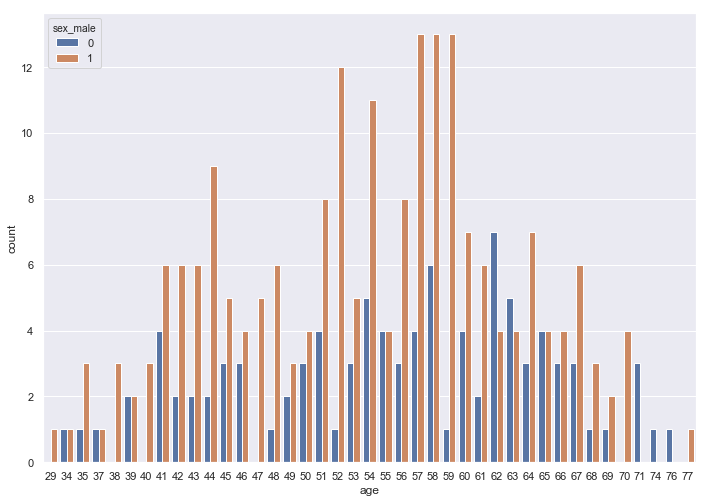

In [114]:
sns.countplot(x='age', data=ds, hue='sex_male')

ValueError: Could not interpret input 'chest_pain'